In [ ]:
#Libraries
import cv2
import numpy as np
from tqdm import tqdm
from statistics import mean
from joblib import dump, load
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import datasets, layers, models




# Data collection

In [ ]:
# Load dataset from tensorflow !
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
# Normalize pixel values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Class labels for reference
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


# Exploratory Data Analysis (EDA)

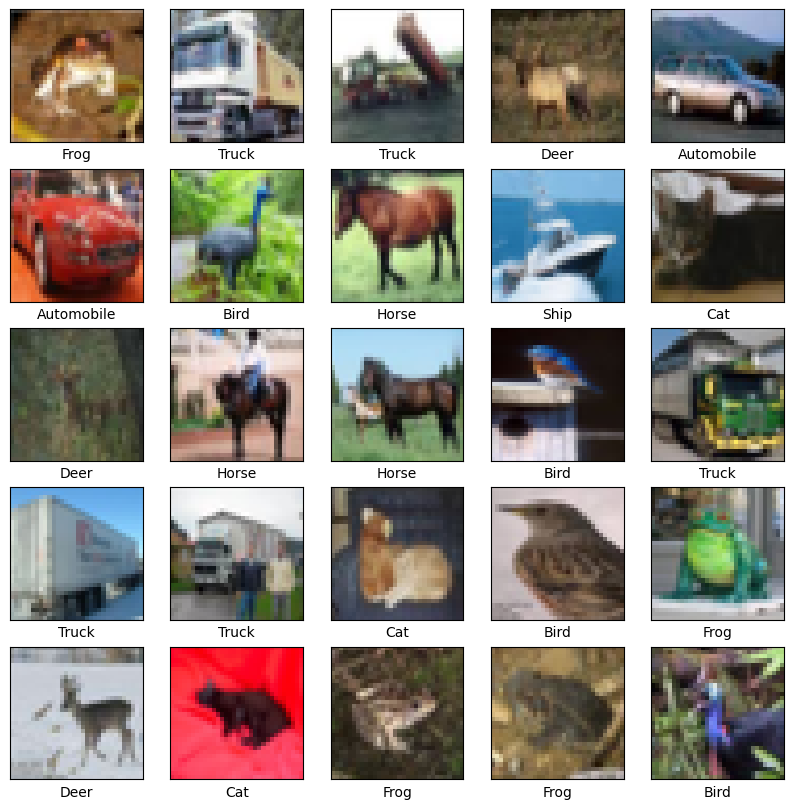

In [ ]:
# Visualize the data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()


# Models

## Deep learing

###CNN

In [ ]:
#Build the Model
model = models.Sequential([
    #Bloc 1
    layers.Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(32, 32, 3)),   #Covolutionnel layers
    layers.BatchNormalization(),  #Batch Normalization
    layers.Conv2D(64, (3, 3), activation='relu',padding="same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),  #Max pooling
    layers.BatchNormalization(),  #Batch Normalization
    layers.Dropout(0.25),       #Drop out

    #Bloc 2
    layers.Conv2D(128, (3, 3), activation='relu',padding="same"),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu',padding="same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.25),       #Drop out

    #Bloc 3
    layers.Conv2D(256, (3, 3), activation='relu',padding="same"),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation='relu',padding="same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.25),

     #Bloc 4
    layers.Conv2D(256, (3, 3), activation='relu',padding="same"),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation='relu',padding="same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.25),

    #Le classifieur
    layers.Flatten(), #Fully connected layer
    layers.Dense(512, activation='relu'),
    #layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax'),

])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 8, 8, 256)           │           1,0

 Total params: 2,863,946 (10.93 MB)

 Trainable params: 2,859,722 (10.91 MB)

 Non-trainable params: 4,224 (16.50 KB)

In [ ]:
#compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #chosed for having 10 classes
              metrics=['accuracy'])


In [ ]:
#Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 20ms/step - accuracy: 0.4208 - loss: 1.7062 - val_accuracy: 0.6383 - val_loss: 1.0436
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 13ms/step - accuracy: 0.6990 - loss: 0.8660 - val_accuracy: 0.7409 - val_loss: 0.7447
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7650 - loss: 0.6716 - val_accuracy: 0.7123 - val_loss: 0.8802
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.8046 - loss: 0.5596 - val_accuracy: 0.7905 - val_loss: 0.6195
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.8430 - loss: 0.4544 - val_accuracy: 0.8036 - val_loss: 0.5885
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.8667 - loss: 0.3894 - val_accuracy: 0.8382 - val_loss: 0.5078
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.8911 - loss: 0.3178 - val_accuracy: 0.8391 - val_loss: 0.5085
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.9053 - loss: 0.27

**Evaluation**

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")


313/313 - 1s - 4ms/step - accuracy: 0.8451 - loss: 0.5418
Test accuracy: 0.8450999855995178


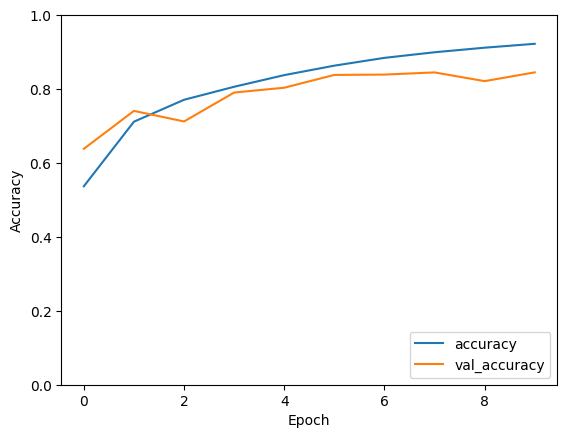

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.utils import to_categorical


# Conversion des étiquettes pour AUC (une seule colonne pour roc_auc_score)
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Prédictions du modèle
y_pred_probs = model.predict(x_test)  # Probabilités prédites
y_pred = np.argmax(y_pred_probs, axis=1)  # Classes prédites

# Calcul du rapport de classification
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=[str(i) for i in range(10)]))




313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1000
           1       0.91      0.94      0.92      1000
           2       0.80      0.79      0.79      1000
           3       0.73      0.71      0.72      1000
           4       0.84      0.84      0.84      1000
           5       0.75      0.79      0.77      1000
           6       0.91      0.84      0.87      1000
           7       0.86      0.91      0.88      1000
           8       0.85      0.95      0.90      1000
           9       0.93      0.89      0.91      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.84     10000
weighted avg       0.85      0.85      0.84     10000



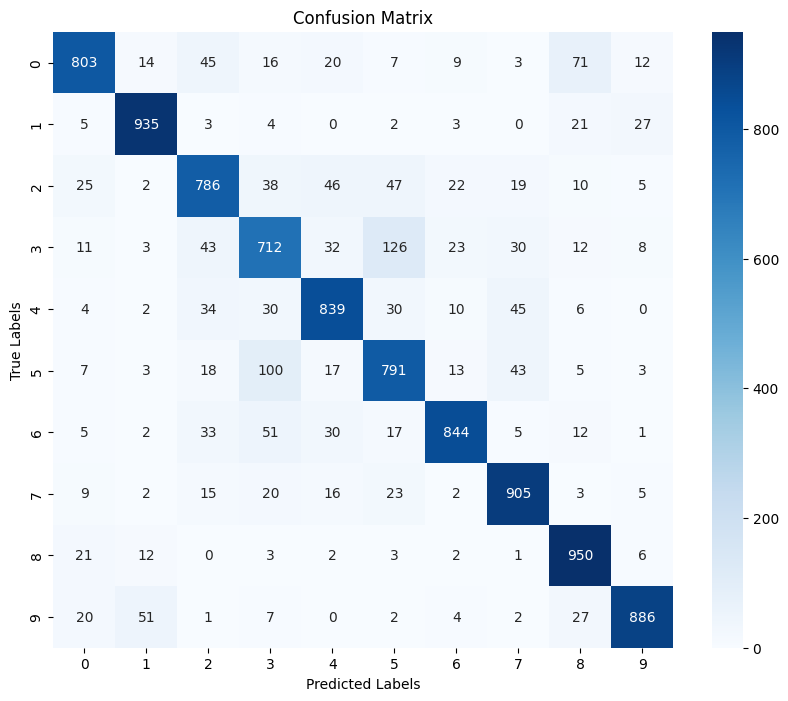

In [ ]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


AUC Scores per Class:
Class 0: 0.9883
Class 1: 0.9964
Class 2: 0.9757
Class 3: 0.9660
Class 4: 0.9853
Class 5: 0.9759
Class 6: 0.9912
Class 7: 0.9922
Class 8: 0.9956
Class 9: 0.9947


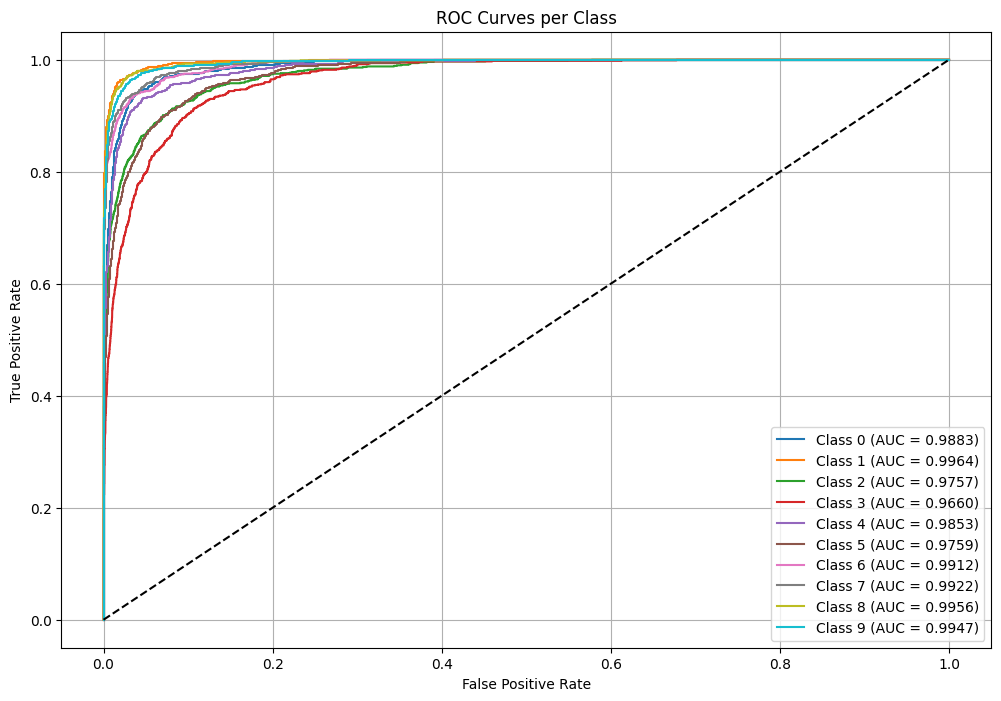

In [ ]:
# AUC par classe
auc_scores = {}
for i in range(10):
    auc = roc_auc_score(y_test_one_hot[:, i], y_pred_probs[:, i])
    auc_scores[f"Class {i}"] = auc

print("\nAUC Scores per Class:")
for label, score in auc_scores.items():
    print(f"{label}: {score:.4f}")

# Courbes ROC
plt.figure(figsize=(12, 8))
for i in range(10):
    fpr, tpr, _ = roc_curve(y_test_one_hot[:, i], y_pred_probs[:, i])
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {auc_scores[f'Class {i}']:.4f})")

plt.plot([0, 1], [0, 1], 'k--')  # Courbe de référence
plt.title("ROC Curves per Class")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


###ANN

In [ ]:
def create_model(learning_rate=0.001, num_neurons_1=512, num_neurons_2=256, activation='relu'):
    model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(num_neurons_1),
        BatchNormalization(),
        ReLU() if activation == 'relu' else Dense(num_neurons_1, activation=activation),
        Dense(num_neurons_2),
        BatchNormalization(),
        ReLU() if activation == 'relu' else Dense(num_neurons_2, activation=activation),
        Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [ ]:
# Paramètres pour GridSearch
param_grid = {
    'learning_rate': [0.001, 0.0005],
    'num_neurons_1': [512, 256],
    'num_neurons_2': [256, 128],
    'activation': ['relu', 'tanh']
}

## Machine learning

###SVM

In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from tensorflow.keras import datasets, layers, models
#Libraries
import matplotlib.pyplot as plt



In [ ]:
def preprocess(xs):
    hog_imgs = []
    for x in tqdm(xs):
        # Assurez-vous que l'image est au format uint8
        if x.dtype != np.uint8:
            x = (x * 255).astype(np.uint8)

        # Convertir l'image en niveaux de gris
        gray = cv2.cvtColor(x, cv2.COLOR_RGB2GRAY)

        # Calculer les descripteurs HOG
        fd = hog(gray, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)
        hog_imgs.append(fd)
    return np.array(hog_imgs)

In [ ]:
X_train_hog = preprocess(x_train)
X_test_hog = preprocess(x_test)

100%|██████████| 10000/10000 [00:04<00:00, 2065.20it/s]


In [ ]:
print(X_train_hog.shape)
print(X_test_hog.shape)

(50000, 324)
(10000, 324)


In [ ]:
pipeline1 = Pipeline([
    ('scaler', StandardScaler()),   # Normalisation des données
    ('pca', PCA(n_components=100)), # Réduction de la dimensionnalité (par exemple, réduire à 100 dimensions)
    ('svm', SVC(kernel='rbf', C=10, gamma=0.01))  # Classificateur SVM
])
pipeline1.fit(X_train_hog, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=100)),
                ('svm', SVC(C=10, gamma=0.01))])

In [ ]:
y_pred1 = pipeline1.predict(X_test_hog)

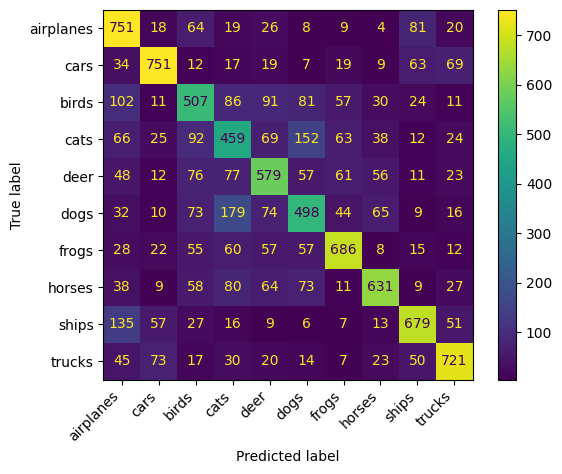

In [ ]:
color = 'white'
cm = confusion_matrix(y_test, y_pred1)
disp = ConfusionMatrixDisplay(cm, display_labels=['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships', 'trucks'])
disp.plot()
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print("\nRapport de classification :")
report=classification_report(y_test, y_pred1, target_names=class_names)
print(report)



Rapport de classification :
              precision    recall  f1-score   support

    Airplane       0.59      0.75      0.66      1000
  Automobile       0.76      0.75      0.76      1000
        Bird       0.52      0.51      0.51      1000
         Cat       0.45      0.46      0.45      1000
        Deer       0.57      0.58      0.58      1000
         Dog       0.52      0.50      0.51      1000
        Frog       0.71      0.69      0.70      1000
       Horse       0.72      0.63      0.67      1000
        Ship       0.71      0.68      0.70      1000
       Truck       0.74      0.72      0.73      1000

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.63     10000
weighted avg       0.63      0.63      0.63     10000



In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np
# Binarisation des étiquettes pour un problème multiclasse
# S'assurer que y_train et y_test sont unidimensionnels
y_train = np.array(y_train).ravel()
y_test = np.array(y_test).ravel()

# Binarisation des étiquettes pour un problème multiclasse
classes = list(np.unique(y_train))  # Liste des classes uniques
y_test_binarized = label_binarize(y_test, classes=list(range(len(set(y_train)))))

# Utiliser la fonction de décision (scores marginaux) pour chaque classe
y_scores = pipeline1.decision_function(X_test_hog)  # Fonction de décision SVM

# Calcul de l'AUC pour chaque classe
auc_per_class = {}
for i in range(y_test_binarized.shape[1]):  # Pour chaque classe
    auc = roc_auc_score(y_test_binarized[:, i], y_scores[:, i])
    auc_per_class[i] = auc

print("AUC par classe :")
for cls, auc in auc_per_class.items():
    print(f"Classe {cls}: {auc:.3f}")

AUC par classe :
Classe 0: 0.932
Classe 1: 0.954
Classe 2: 0.867
Classe 3: 0.829
Classe 4: 0.887
Classe 5: 0.866
Classe 6: 0.935
Classe 7: 0.926
Classe 8: 0.937
Classe 9: 0.941


In [ ]:


# Aplatir les images : de (32, 32, 3) à (3072,)
X_train_flat = x_train.reshape(x_train.shape[0], -1)
X_test_flat = x_test.reshape(x_test.shape[0], -1)

# Normalisation des données
scaler = StandardScaler()
X_train_flat = scaler.fit_transform(X_train_flat)
X_test_flat = scaler.transform(X_test_flat)

# Création du modèle SVM avec un noyau RBF
svm_model = SVC(kernel='rbf', C=10, gamma=0.01)

# Entraînement du modèle
svm_model.fit(X_train_flat, y_train.ravel())

# Prédiction sur les données de test
y_pred = svm_model.predict(X_test_flat)

# Évaluation des performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

### Random Forest Classifier

In [ ]:

from tensorflow.keras.datasets import cifar10
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
''' using subsets of the datasets as input '''
subset_size_train = 5000
subset_size_test = 2000
indices_train = np.random.choice(x_train.shape[0], subset_size_train, replace=False)
indices_test = np.random.choice(x_test.shape[0], subset_size_test, replace=False)
x_train_subset = x_train[indices_train]
y_train_subset = y_train[indices_train]
x_test_subset = x_test[indices_test]
y_test_subset = y_test[indices_test]

In [ ]:
''' Random forest classifier takes 1D array inputs , the code flattens and normalizes the input'''
x_train_flat = x_train_subset.reshape(x_train_subset.shape[0], -1) / 255.0
x_test_flat = x_test_subset.reshape(x_test_subset.shape[0], -1) / 255.0

In [ ]:
print(f"Missing values in training data: {np.isnan(x_train_flat).sum()}")
print(f"Missing values in test data: {np.isnan(x_test_flat).sum()}")

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_flat, y_train_subset.ravel())

In [ ]:
''' the code shows the feature which are more important and has bigger effect(coeficient)'''

feature_importances = rf.feature_importances_
feature_df = pd.DataFrame({
    "Feature": [f"pixel_{i}" for i in range(len(feature_importances))],
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

print(feature_df.head(20))

In [ ]:
top_features = feature_df.index[:500]
x_train_top = x_train_flat[:, top_features]
x_test_top = x_test_flat[:, top_features]
print(f"Reduced training shape: {x_train_top.shape}, Reduced test shape: {x_test_top.shape}")

In [ ]:
''' Training the the mdoel with different hyperparameters '''
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_rf.fit(x_train_top, y_train_subset.ravel())


print(f"Best parameters: {grid_rf.best_params_}")
print(f"Best cross-validated accuracy: {grid_rf.best_score_}")

In [ ]:
param_grid = {
    'n_estimators': [300, 500],
    'max_depth': [None, 10, 20 , 30],
    'min_samples_split': [2, 5 , 10],
    'min_samples_leaf': [1, 2 , 4]
}
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_rf.fit(x_train_top, y_train_subset.ravel())


print(f"Best parameters: {grid_rf.best_params_}")
print(f"Best cross-validated accuracy: {grid_rf.best_score_}")

In [ ]:
''' Using the model which has best performance for predicting '''
best_rf = grid_rf.best_estimator_
y_pred = best_rf.predict(x_test_top)
cm = confusion_matrix(y_test_subset.ravel(), y_pred)

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(classification_report(y_test_subset.ravel(), y_pred))

In [ ]:
y_pred_proba = best_rf.predict_proba(x_test_top)
auc_score = roc_auc_score(y_test_subset, y_pred_proba, multi_class='ovr')
print(f"Multiclass AUC (OvR): {auc_score:.4f}")